# Import Library

Mengimport library yang diperlukan seperti pandas, dll

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

Insight: 
* Import Library yang diperlukan 

# Load Dataset

Memanggil dataset (spotify dataset) yang akan digunakan dengan menggunakan fungsi pandas

In [2]:
df = pd.read_csv('/kaggle/input/spotify-dataset-1921-2020-160k-tracks/data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Insight:
* Terdapat beberapa kolom dalam dataset ini.
* Tidak terdapat missing value pada kolom-kolom awal berdasarkan `df.head()`, tetapi perlu divalidasi lebih lanjut secara keseluruhan.

# EDA (Exploratory Data Analysis)

Mengenal data lebih dalam dengan beberapa function yang ada seperti df.info() dan lain-lain

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


Insight:
* Terdapat 170.653 data entri
* Fitur `year` berkisar dari 1921 hingga 2020, menunjukkan distribusi lagu historis yang luas.
* Nilai `duration_ms` bervariasi sangat besar, dari 5.100 ms hingga 5.403.500 ms.
* Banyak fitur audio seperti `valence`, `danceability`, dan `energy` memiliki nilai antara 0–1, cocok untuk perhitungan similarity.
* `loudness` punya rentang ekstrem, dari -60 dB hingga hampir 4 dB, perlu distandardisasi.

Melakukan pengecekan apakah dataset yang telah dipanggil, terdapat missing value atau tidak

In [4]:
print("Jumlah missing value:")
df.isnull().sum()

Jumlah missing value:


valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

Insight:
* Tidak ditemukan missing value di seluruh kolom.

Mengecek pengecekan apakah dataset terdapat yang duplikat atau tidak 

In [5]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


Insight:
* Tidak ditemukan adanya data dupilkat

In [6]:
fitur_audio = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

df[fitur_audio].head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.279,0.211,10,-20.096,1,0.0366,0.982,0.878000,0.665,0.0594,80.954
1,0.819,0.341,7,-12.441,1,0.4150,0.732,0.000000,0.160,0.9630,60.936
2,0.328,0.166,3,-14.850,1,0.0339,0.961,0.913000,0.101,0.0394,110.339
3,0.275,0.309,5,-9.316,1,0.0354,0.967,0.000028,0.381,0.1650,100.109
4,0.418,0.193,3,-10.096,1,0.0380,0.957,0.000002,0.229,0.2530,101.665


Insight:
* Proses pemilihan fitur audio sudah memiliki format numerik, jadi siap untuk proses normalisasi.

Menampilkan kolom yang tersedia dalam dataset tetapi dalam bentuk list

In [7]:
print(df.columns.tolist())

['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo']


Insight: 
* Menampilkan kolom ke dalam bentuk list, agar mudah dilihat untuk proses selanjutnya

# Data Preparation (Preprocessing)

Dilakukan normalisasi fitur audio menggunakan MinMaxScaler agar berada dalam skala yang sama (0–1)

In [8]:
scaler = MinMaxScaler()
audio_scaled = scaler.fit_transform(df[fitur_audio])

df_scaled = pd.DataFrame(audio_scaled, columns=fitur_audio)

df_scaled['track_name'] = df['name']
df_scaled['artist_name'] = df['artists']

df_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_name,artist_name
0,0.282389,0.211,0.909091,0.624916,1.0,0.037732,0.985944,0.878000,0.665,0.0594,0.332450,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli..."
1,0.828947,0.341,0.636364,0.744797,1.0,0.427835,0.734940,0.000000,0.160,0.9630,0.250243,Clancy Lowered the Boom,['Dennis Day']
2,0.331984,0.166,0.272727,0.707071,1.0,0.034948,0.964859,0.913000,0.101,0.0394,0.453125,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3,0.278340,0.309,0.454545,0.793736,1.0,0.036495,0.970884,0.000028,0.381,0.1650,0.411113,Danny Boy,['Frank Parker']
4,0.423077,0.193,0.272727,0.781521,1.0,0.039175,0.960843,0.000002,0.229,0.2530,0.417503,When Irish Eyes Are Smiling,['Phil Regan']


Insight:
* Hasil dari scalling tersebut akan digabung dengan nama lagu dan artis untuk referensi output dari sistem rekomendasi.

# Modelling

In [9]:
df_sample = df_scaled.sample(n=10000, random_state=42)

similarity_matrix = cosine_similarity(df_sample[fitur_audio])

similarity_df = pd.DataFrame(similarity_matrix, 
                             index=df_sample['track_name'], 
                             columns=df_sample['track_name'])

similarity_df.iloc[0].sort_values(ascending=False)[1:6]

track_name
Plantation Inn           0.993444
Partido Alto             0.989180
Comin' Home Baby         0.988744
We've Only Just Begun    0.988714
Lady Be Good             0.988427
Name: Camby Bolongo, dtype: float64

Insight: 
* Dilakukan pengambilan sampel sebanyak 10.000 lagu untuk efisiensi perhitungan cosine similarity (serta menghindari data loading yang terlalu lama). Kemudian dibentuk similarity matrix antar lagu menggunakan fitur audio, dan ditampilkan 5 lagu teratas yang paling mirip dengan lagu pertama di dataset berdasarkan nilai similirarity tertinggi.

In [17]:
def rekomendasi_lagu(judul_lagu, df_similar, jumlah=5):
    if judul_lagu not in df_similar.columns:
        return f"Lagu '{judul_lagu}' tidak ditemukan dalam dataset."

    similar_songs = df_similar[judul_lagu].sort_values(ascending=False).iloc[1:jumlah+1]

    hasil_df = pd.DataFrame({
        'Track Name': similar_songs.index,
        'Similarity Score': similar_songs.values
    })

    return hasil_df


def evaluasi_lagu(list_judul, df_similar):
    for judul in list_judul:
        print(f"\nJudul: {judul}")
        hasil = rekomendasi_lagu(judul, df_similar)
        if isinstance(hasil, str):
            print("tidak ada", hasil)
        else:
            print("Rekomendasi lagu yang sama:")
            print(hasil)


Insight:
* Pada cell diatas dibuat dua fungsi modular, yaitu `rekomendasi_lagu()` untuk menghasilkan tabel rekomendasi berdasarkan lagu input, dan `evaluasi_lagu()` untuk menguji beberapa lagu sekaligus serta menangani kondisi jika lagu tidak ditemukan.

# Evaluasi (Testing)

In [18]:
lagu_uji = [
    'Camby Bolongo',
    'Castle on a Cloud',
    'Someone Like You',
    'Eso Hey Sajal Shyam Ghana Deya',
    'Bohemian Rhapsody'
]

evaluasi_lagu(lagu_uji, similarity_df)



Judul: Camby Bolongo
Rekomendasi lagu yang sama:
              Track Name  Similarity Score
0         Plantation Inn          0.993444
1           Partido Alto          0.989180
2       Comin' Home Baby          0.988744
3  We've Only Just Begun          0.988714
4           Lady Be Good          0.988427

Judul: Castle on a Cloud
Rekomendasi lagu yang sama:
                        Track Name  Similarity Score
0         Do Dilon Ko Ek Dil Milke          0.997710
1            Jab Dard Ka Kissa Ham          0.994526
2                     Just in Time          0.993195
3  5 Mélodies, Op.58: 1. Mandoline          0.992134
4         Amado mio (from "Gilda")          0.991574

Judul: Someone Like You
tidak ada Lagu 'Someone Like You' tidak ditemukan dalam dataset.

Judul: Eso Hey Sajal Shyam Ghana Deya
Rekomendasi lagu yang sama:
                                  Track Name  Similarity Score
0                      Jimmy Loves Mary-Anne          0.992807
1                                   M

Insight:
* Evaluasi dilakukan dengan menguji beberapa lagu untuk melihat rekomendasi yang diberikan sistem. Lagu yang ditemukan menghasilkan daftar lagu serupa berdasarkan similarity score, sedangkan lagu yang tidak ditemukan ditangani dengan error handling yang sesuai (Tidak Ditemukan).

# Visualisasi Hasil Model

Akan dibuat visualisasi heatmap dengan tujuan menampilkan tingkat kemiripan antar lagu dalam subset berdasarkan skor cosine similarity.


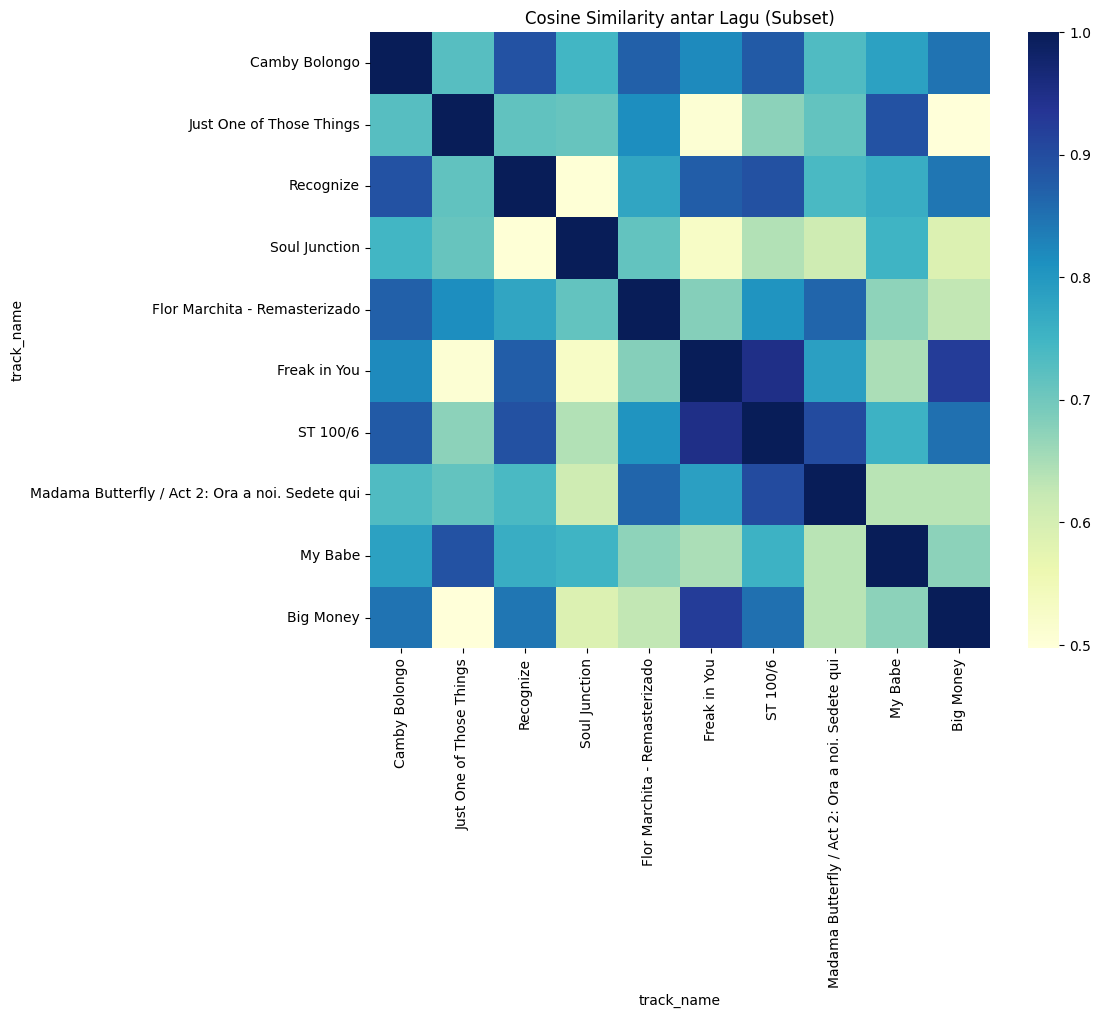

In [20]:
# Heatmap
subset = similarity_df.iloc[:10, :10]

plt.figure(figsize=(10, 8))
sns.heatmap(subset, annot=False, cmap="YlGnBu")
plt.title('Cosine Similarity antar Lagu (Subset)')
plt.show()

Insight:
* Heatmap menunjukkan pola kemiripan antar lagu dalam subset, warna biru tua menandakan similarity tinggi, yang mengindikasikan keberhasilan model dalam mengelompokkan lagu dengan karakteristik audio serupa dan warna menuju kuning menandakan lagu yang tidak mirip sama sekali (similirarity score kecil).

Visualisasi PCA digunakan untuk memproyeksikan lagu-lagu ke dalam 2 dimensi agar distribusi dan pengelompokan berdasarkan fitur audio lebih mudah diamati.

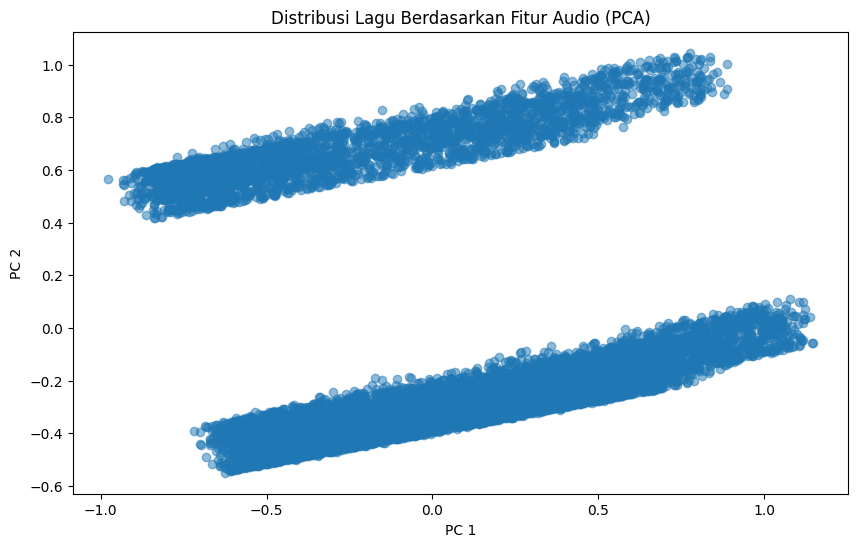

In [22]:
# 2D Projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_sample[fitur_audio])

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('Distribusi Lagu Berdasarkan Fitur Audio')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

Insight:
* Hasil PCA menunjukkan bahwa lagu-lagu dengan fitur audio serupa cenderung membentuk dua klaster dominan, yang mengindikasikan adanya pengelompokan alami berdasarkan karakteristik musiknya.